# Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [32]:
df = pd.read_csv("cardiotocography_v2.csv")

# Dataset structure

In [33]:
# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nData structure:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset shape: (2126, 22)
Memory usage: 0.36 MB

Data structure:
      LB     AC   FM     UC     DL   DS   DP  ASTV  MSTV  ALTV  ...   Min  \
0  120.0  0.000  0.0  0.000  0.000  0.0  0.0  73.0   0.5  43.0  ...  62.0   
1  132.0  0.006  0.0  0.006  0.003  0.0  0.0  17.0   2.1   0.0  ...  68.0   
2    NaN  0.003  0.0  0.008    NaN  0.0  0.0  16.0   2.1   0.0  ...  68.0   
3  134.0  0.003  0.0  0.008  0.003  NaN  0.0  16.0   2.4   0.0  ...  53.0   
4  132.0  0.007  0.0  0.008  0.000  0.0  0.0  16.0   2.4   0.0  ...  53.0   

     Max  Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  CLASS  
0  126.0   2.0     0.0  120.0  137.0   121.0      73.0       NaN      9  
1  198.0   6.0     1.0  141.0  136.0   140.0      12.0       0.0      6  
2  198.0   5.0     NaN    NaN  135.0   138.0      13.0       0.0      6  
3  170.0  11.0     0.0  137.0  134.0   137.0      13.0       1.0      6  
4  170.0   9.0     0.0  137.0  136.0   138.0      11.0       NaN      2  

[5 rows x 22 columns]

Data

From this brief intro we can already see that in each column there's missing data and values in columns varies in range so we'll need to normalize/standarize the data.

# Analyze data types

In [34]:
def analyze_data_types(df: pd.DataFrame):
    """
    Analyze and categorize different types of variables in the dataset.
    This helps us understand what kind of preprocessing and analysis each column needs.
    """

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
    print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

   
    if numeric_cols:
        print("\n📈 Numeric column characteristics:")
        for col in numeric_cols:
            unique_vals = df[col].nunique()
            data_range = f"{df[col].min():.2f} to {df[col].max():.2f}"
            print(f"  {col}: {unique_vals} unique values, range: {data_range}")

    return numeric_cols, categorical_cols


numeric_cols, categorical_cols = analyze_data_types(df)

Numeric columns (22): ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'CLASS']
Categorical columns (0): []

📈 Numeric column characteristics:
  LB: 48 unique values, range: 106.00 to 160.00
  AC: 19 unique values, range: 0.00 to 0.02
  FM: 99 unique values, range: 0.00 to 0.48
  UC: 16 unique values, range: 0.00 to 0.01
  DL: 16 unique values, range: 0.00 to 0.01
  DS: 2 unique values, range: 0.00 to 0.00
  DP: 6 unique values, range: 0.00 to 0.01
  ASTV: 75 unique values, range: 12.00 to 87.00
  MSTV: 57 unique values, range: 0.20 to 7.00
  ALTV: 87 unique values, range: 0.00 to 91.00
  MLTV: 246 unique values, range: 0.00 to 50.70
  Width: 154 unique values, range: 3.00 to 180.00
  Min: 109 unique values, range: 50.00 to 159.00
  Max: 86 unique values, range: 122.00 to 238.00
  Nmax: 18 unique values, range: 0.00 to 18.00
  Nzeros: 7 unique values, range: 0.00 to 10.0

Confirmation from the previous point - different ranges of values for each column. Also we can see that some columns have only few unique values (DS, DP, Nzeros, Tendency).

Also there is no categorical values.

# Missing data analysis

🔍 Analyzing missing data patterns...
📊 Columns with missing data:
          Missing_Count  Missing_Percentage
DS                  132            6.208843
Min                 126            5.926623
Nzeros              124            5.832549
UC                  114            5.362183
AC                  113            5.315146
ASTV                111            5.221072
DP                  110            5.174036
FM                  109            5.126999
MLTV                109            5.126999
Mean                107            5.032926
Tendency            107            5.032926
Nmax                105            4.938852
LB                  103            4.844779
Width               103            4.844779
Mode                102            4.797742
MSTV                102            4.797742
Median              101            4.750706
Variance             97            4.562559
ALTV                 96            4.515522
Max                  88            4.139229
DL        

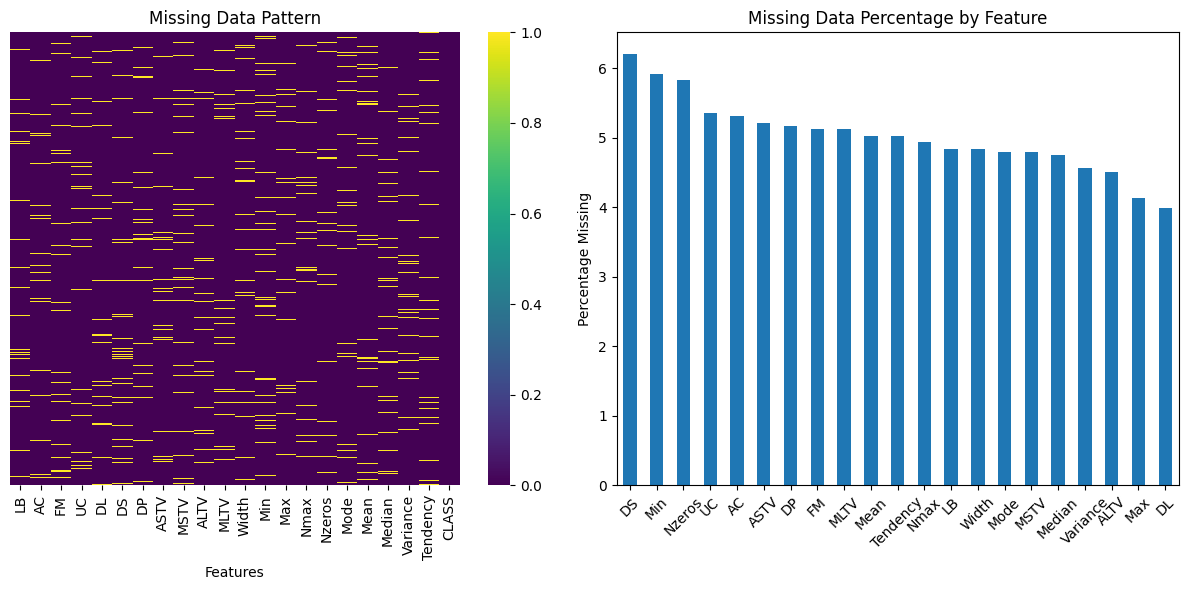

In [35]:
def analyze_missing_data(df: pd.DataFrame):
    """
    Comprehensive missing data analysis.
    Understanding missing data patterns is crucial for deciding preprocessing strategies.
    """
    print("🔍 Analyzing missing data patterns...")

    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    missing_df = pd.DataFrame(
        {"Missing_Count": missing_data, "Missing_Percentage": missing_percent}
    )

    # Filter columns with missing data
    missing_df = missing_df[missing_df["Missing_Count"] > 0].sort_values(
        "Missing_Count", ascending=False
    )

    if not missing_df.empty:
        print("📊 Columns with missing data:")
        print(missing_df)

        # Visualize missing data pattern
        plt.figure(figsize=(12, 6))

        # Missing data heatmap
        plt.subplot(1, 2, 1)
        sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap="viridis")
        plt.title("Missing Data Pattern")
        plt.xlabel("Features")

        # Missing data bar plot
        plt.subplot(1, 2, 2)
        missing_df["Missing_Percentage"].plot(kind="bar")
        plt.title("Missing Data Percentage by Feature")
        plt.ylabel("Percentage Missing")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        return missing_df
    else:
        print("✅ No missing data found!")
        return None


missing_info = analyze_missing_data(df)

From the heatmap we can conclude that the missing data is distributed pretty randomly which is correct with the task description that the dataset was previously modified for the task.

It will help to impute missing data using simple methods (e.g. mean or median instead of k-NN) and to avoid introducing bias into our models.

# Statistical summary

In [36]:
def statistical_summary(df: pd.DataFrame, numeric_cols):
    """
    Generate comprehensive statistical summary.
    This reveals data distribution characteristics, outliers, and scale differences.
    """
    print("📊 Descriptive statistics for numeric features:")

    # Enhanced describe with additional statistics
    desc_stats = df[numeric_cols].describe()

    # Add additional statistics
    additional_stats = pd.DataFrame(
        {
            "skewness": df[numeric_cols].skew(),
            "kurtosis": df[numeric_cols].kurtosis(),
            "variance": df[numeric_cols].var(),
        }
    ).T

    # Combine statistics
    full_stats = pd.concat([desc_stats, additional_stats])
    print(full_stats.round(3))

    return full_stats


stats_summary = statistical_summary(df, numeric_cols)

📊 Descriptive statistics for numeric features:
                LB        AC        FM        UC        DL        DS  \
count     2023.000  2013.000  2017.000  2012.000  2041.000  1994.000   
mean       133.277     0.003     0.009     0.004     0.002     0.000   
std          9.812     0.004     0.045     0.003     0.003     0.000   
min        106.000     0.000     0.000     0.000     0.000     0.000   
25%        126.000     0.000     0.000     0.002     0.000     0.000   
50%        133.000     0.002     0.000     0.005     0.000     0.000   
75%        140.000     0.006     0.003     0.007     0.003     0.000   
max        160.000     0.018     0.481     0.015     0.015     0.001   
skewness     0.009     1.191     7.971     0.152     1.707    18.161   
kurtosis    -0.318     0.669    67.509    -0.640     2.455   328.162   
variance    96.267     0.000     0.002     0.000     0.000     0.000   

                DP      ASTV      MSTV      ALTV  ...       Min       Max  \
count     2

328.0 of kurtosis in DS (serious deceleration) may suggest a small number of cases with dramatically different deceleration patterns compared to the majority of data.

Similarly, the FM (fetal movements) feature shows kurtosis of 67.509 and skewness of 7.971. This extreme right skew tells that while most recordings show relatively few movements, there are some cases with exceptionally high movement counts.

Big scale disparity in variances just assures us that we'll need to normalize/standarize the data.



# Target variable analysis

🎯 Analyzing target variable: CLASS

📈 Target variable distribution:
  Class 1: 384 samples (18.1%)
  Class 2: 579 samples (27.2%)
  Class 3: 53 samples (2.5%)
  Class 4: 81 samples (3.8%)
  Class 5: 72 samples (3.4%)
  Class 6: 332 samples (15.6%)
  Class 7: 252 samples (11.9%)
  Class 8: 107 samples (5.0%)
  Class 9: 69 samples (3.2%)
  Class 10: 197 samples (9.3%)


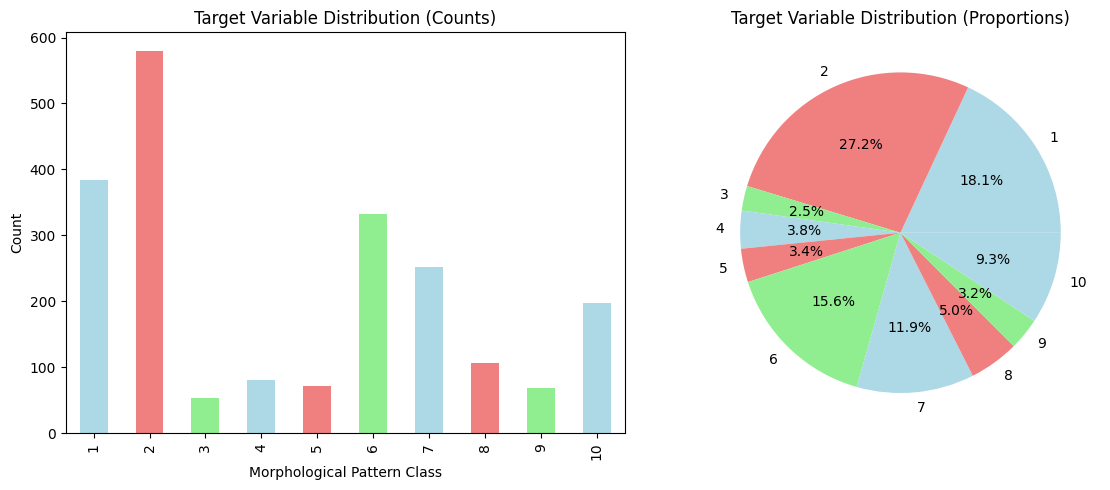

In [37]:
def analyze_target_variable(
    df: pd.DataFrame, target_column="CLASS"
): 
    """
    Analyze the target variable (fetal morphological patterns).
    Understanding target distribution is crucial for classification strategy.
    """
    if target_column not in df.columns:
        print(
            f"⚠️  Target column '{target_column}' not found. Please specify the correct target column."
        )
        return

    print(f"🎯 Analyzing target variable: {target_column}")

    # Target distribution
    target_counts = df[target_column].value_counts().sort_index()
    target_props = df[target_column].value_counts(normalize=True).sort_index()

    print("\n📈 Target variable distribution:")
    for class_val, count in target_counts.items():
        percentage = target_props[class_val] * 100
        print(f"  Class {class_val}: {count} samples ({percentage:.1f}%)")

    # Visualize target distribution
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    target_counts.plot(kind="bar", color=["lightblue", "lightcoral", "lightgreen"])
    plt.title("Target Variable Distribution (Counts)")
    plt.xlabel("Morphological Pattern Class")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    target_props.plot(
        kind="pie", autopct="%1.1f%%", colors=["lightblue", "lightcoral", "lightgreen"]
    )
    plt.title("Target Variable Distribution (Proportions)")
    plt.ylabel("")

    plt.tight_layout()
    plt.show()


analyze_target_variable(df, "CLASS")

From the charts we can see that there's a class imbalance - big number of cases with CLASS=1 and CLASS=2 compared to the cases from the other side of range.<br>
We'll have to take it into account.<br>
Cases with CLASS value 0-4 are considered **normal**.<br>
Cases with CLASS value 5-7 are marked as normal at times but with **suspicious** signs<br>
Cases wtih CLASS value 8-10 are considered **pathological** - these are the cases that we'd like to spot and recognize since these are the most dangerous.

# Individual feature distribution analysis

📊 Analyzing feature distributions...


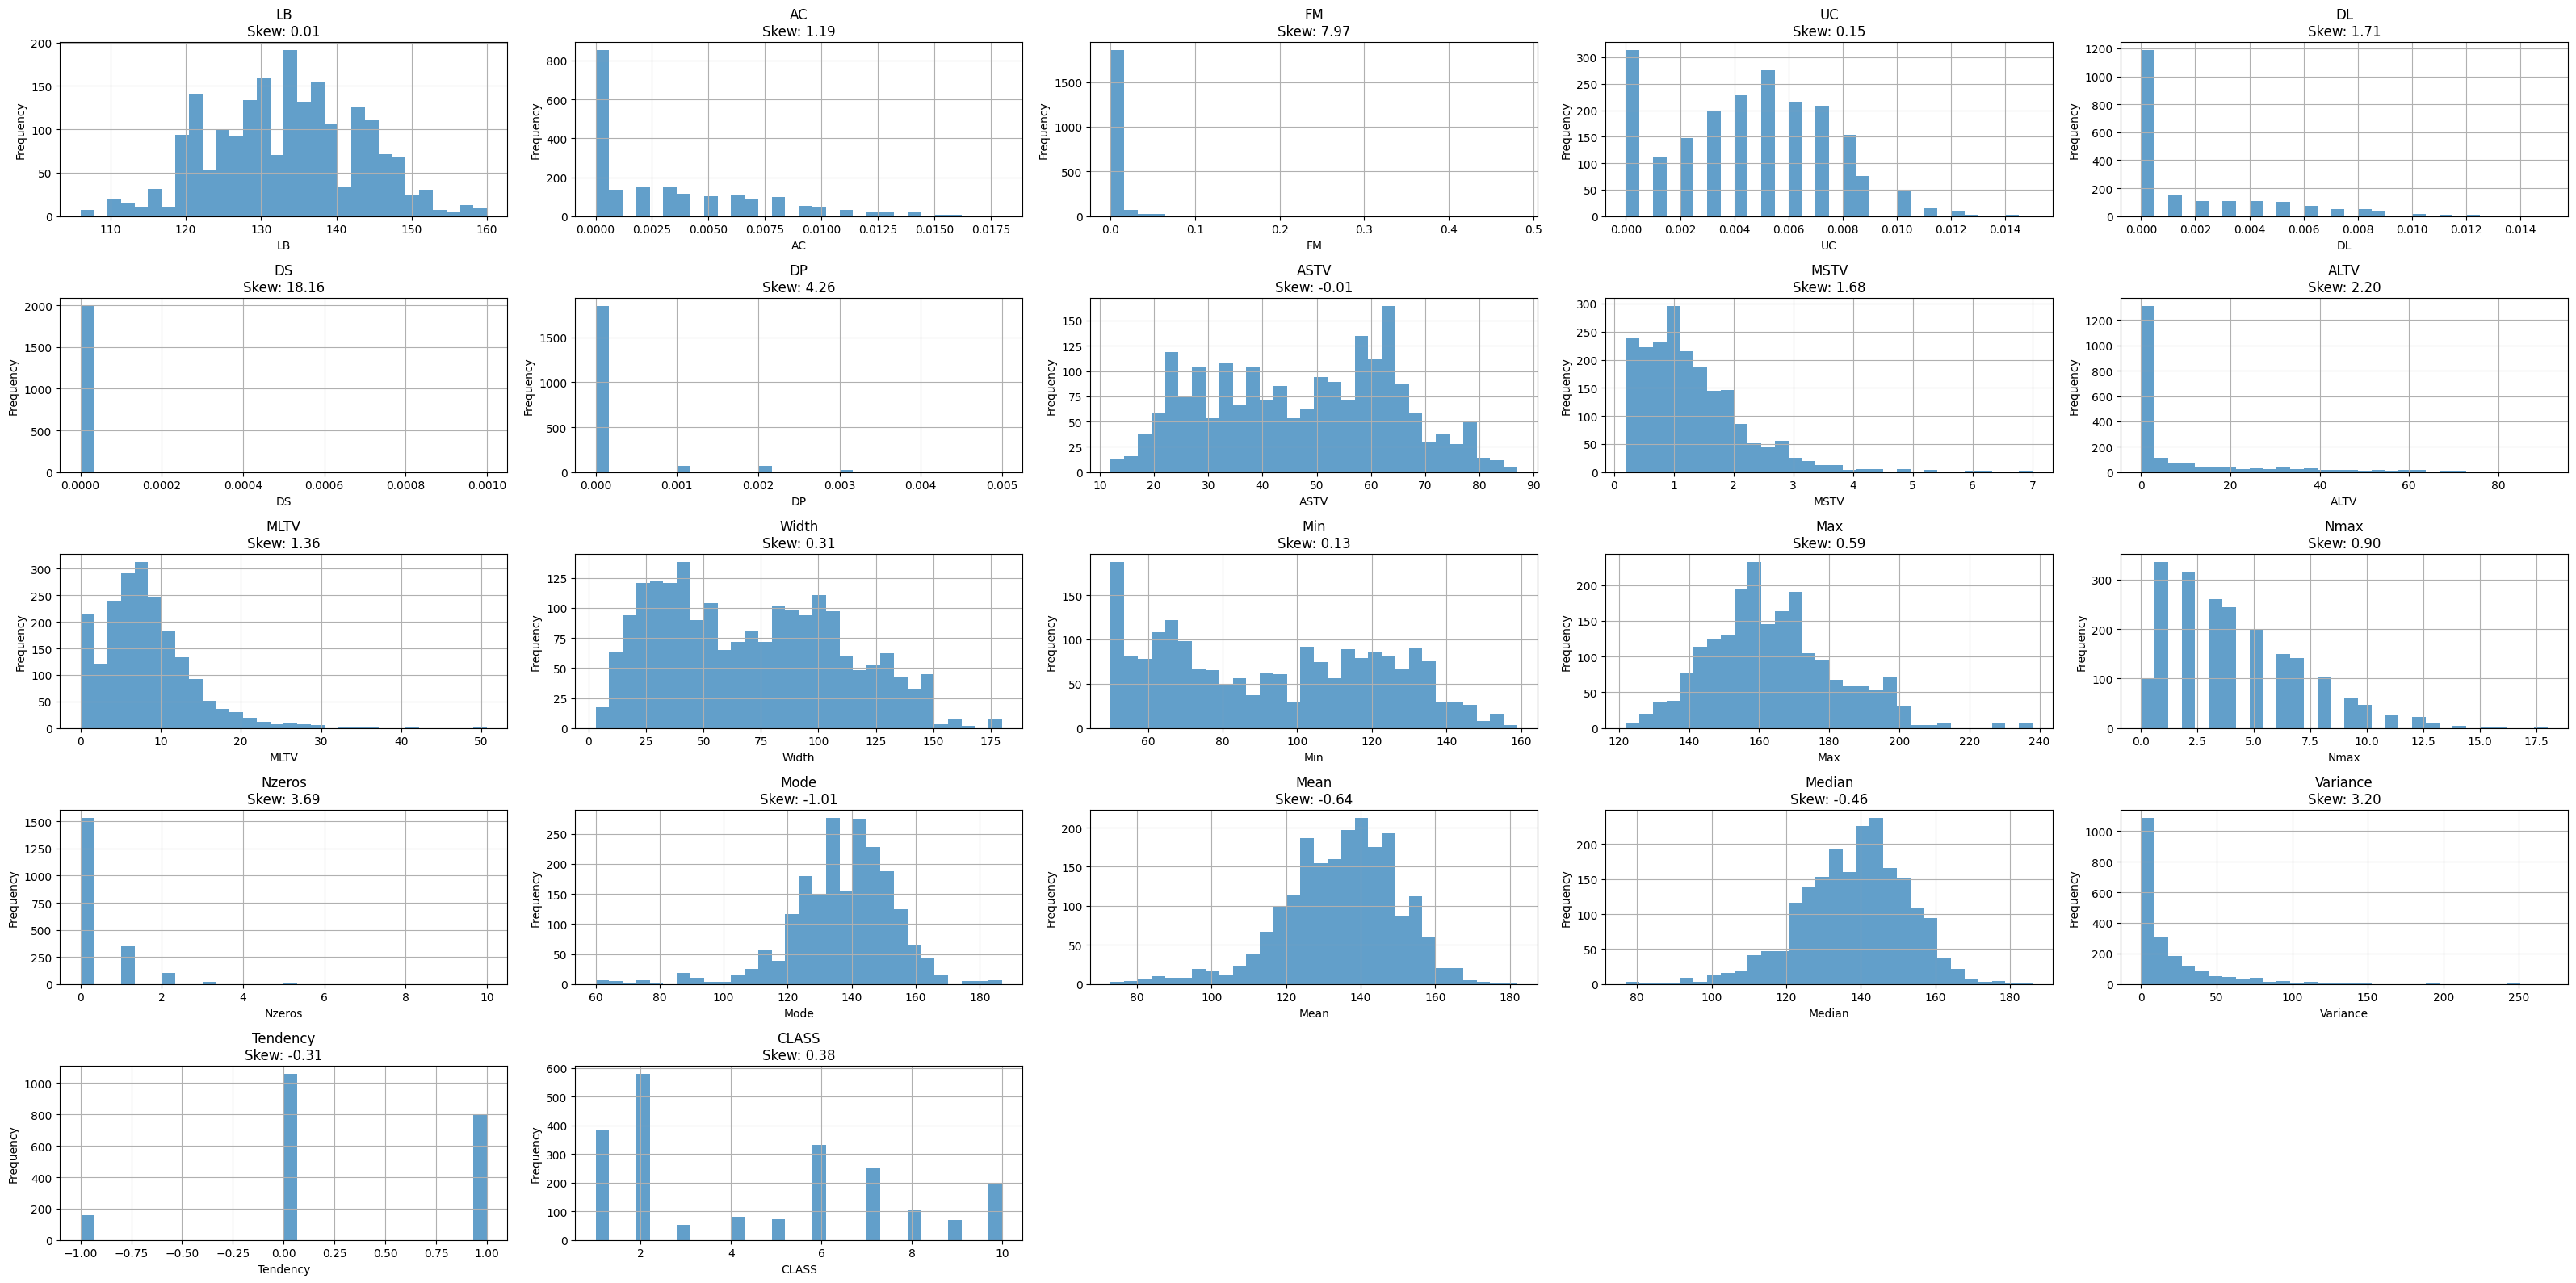


⚠️  Highly skewed features (|skewness| > 1):
  AC: 1.191
  FM: 7.971
  DL: 1.707
  DS: 18.161
  DP: 4.261
  MSTV: 1.675
  ALTV: 2.199
  MLTV: 1.362
  Nzeros: 3.693
  Mode: -1.006
  Variance: 3.196


In [38]:
def analyze_feature_distributions(df: pd.DataFrame, numeric_cols):
    """
    Analyze individual feature distributions to understand data characteristics.
    This helps identify skewness, outliers, and potential transformation needs.
    """
    print("📊 Analyzing feature distributions...")

    features_to_plot = numeric_cols

    fig, axes = plt.subplots(5, 5, figsize=(32, 16))
    axes = axes.ravel()

    for i, col in enumerate(features_to_plot):
        if i < len(axes):
            # Histogram with KDE
            df[col].hist(bins=30, alpha=0.7, ax=axes[i])
            axes[i].set_title(f"{col}\nSkew: {df[col].skew():.2f}")
            axes[i].set_xlabel(col)
            axes[i].set_ylabel("Frequency")

    # Hide unused subplots
    for i in range(len(features_to_plot), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Identify highly skewed features
    skewed_features = []
    for col in numeric_cols:
        skewness = abs(df[col].skew())
        if skewness > 1:  # Threshold for high skewness
            skewed_features.append((col, df[col].skew()))

    if skewed_features:
        print("\n⚠️  Highly skewed features (|skewness| > 1):")
        for feature, skew_val in skewed_features:
            print(f"  {feature}: {skew_val:.3f}")


analyze_feature_distributions(df, numeric_cols)


The distribution patterns suggest this dataset contains predominantly normal or low-risk pregnancies, with fewer high-risk cases. This creates a "class imbalance" problem.<br>
This has the following implications:<br>
The predominance of normal cases means that simply predicting "normal" for every case might give high accuracy but would miss the critical abnormal cases that actually need medical intervention

# Feature correlation analysis

🔗 Analyzing feature correlations...


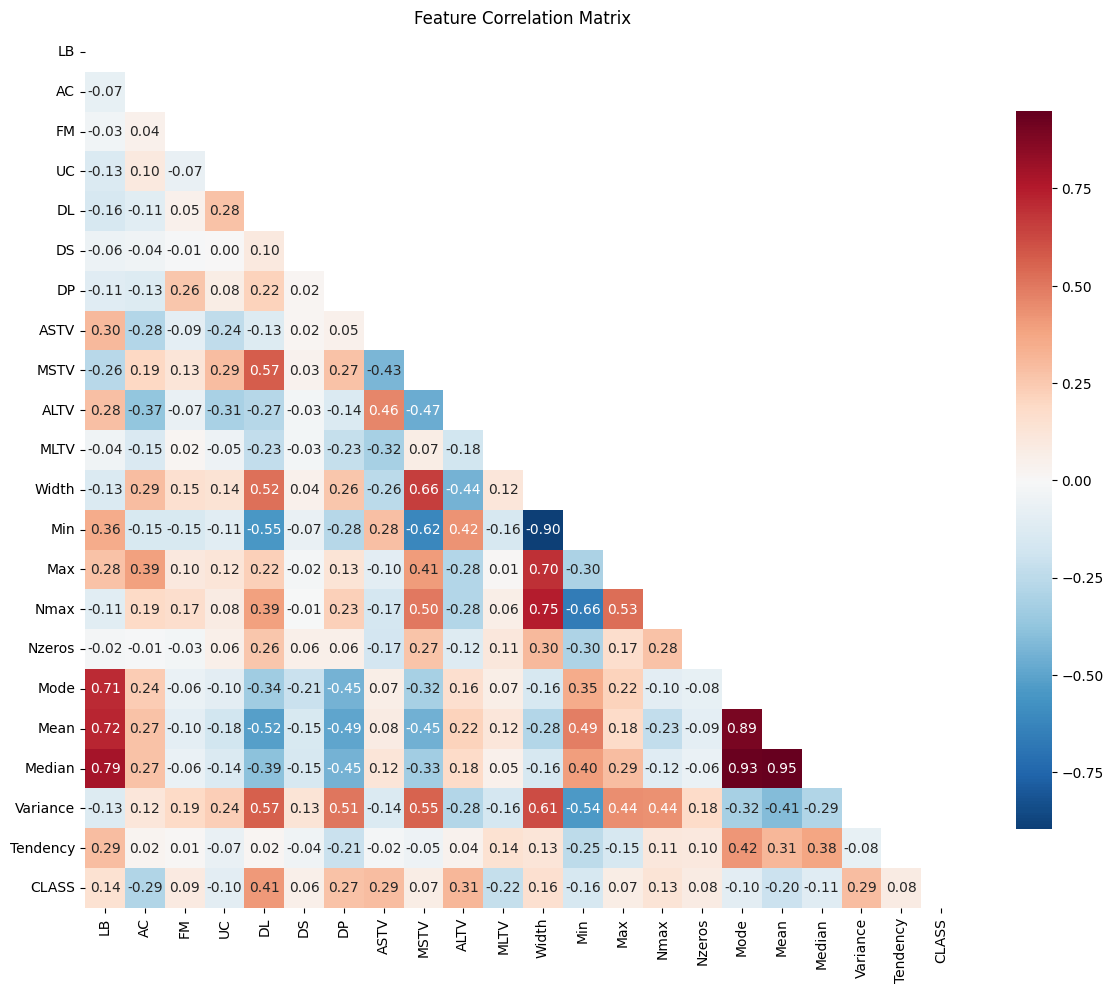


⚠️  Highly correlated feature pairs (|correlation| > 0.8):
  Width ↔ Min: -0.897
  Mode ↔ Mean: 0.895
  Mode ↔ Median: 0.933
  Mean ↔ Median: 0.950
Consider removing one feature from each pair to reduce multicollinearity.


In [39]:
def correlation_analysis(df: pd.DataFrame, numeric_cols):
    """
    Analyze correlations between features to identify multicollinearity
    and feature relationships important for model performance.
    """
    print("🔗 Analyzing feature correlations...")

    # Calculate correlation matrix
    correlation_matrix = df[numeric_cols].corr()

    # Visualize correlation matrix
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(
        correlation_matrix,
        mask=mask,
        annot=True,
        cmap="RdBu_r",
        center=0,
        square=True,
        fmt=".2f",
        cbar_kws={"shrink": 0.8},
    )
    plt.title("Feature Correlation Matrix")
    plt.tight_layout()
    plt.show()

    # Identify highly correlated feature pairs
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.8:  # High correlation threshold
                high_corr_pairs.append(
                    (
                        correlation_matrix.columns[i],
                        correlation_matrix.columns[j],
                        corr_val,
                    )
                )

    if high_corr_pairs:
        print("\n⚠️  Highly correlated feature pairs (|correlation| > 0.8):")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
        print(
            "Consider removing one feature from each pair to reduce multicollinearity."
        )
    else:
        print("\n✅ No highly correlated feature pairs found.")


correlation_analysis(df, numeric_cols)

There are no strongly correlated characteristics that we'd consider to be important - I think it's safe to say that mode, median and mean are strongly correlated because they all measure central tendency and often yield similar values when a dataset is symmetrically distributed without extreme outliers.

# Outlier detection

🔍 Detecting outliers using IQR method...

📊 Outlier summary:
  AC: 11 outliers (0.5%)
  FM: 295 outliers (13.9%)
  UC: 1 outliers (0.0%)
  DL: 144 outliers (6.8%)
  DS: 6 outliers (0.3%)
  DP: 172 outliers (8.1%)
  MSTV: 66 outliers (3.1%)
  ALTV: 295 outliers (13.9%)
  MLTV: 67 outliers (3.2%)
  Max: 24 outliers (1.1%)
  Nmax: 19 outliers (0.9%)
  Nzeros: 473 outliers (22.2%)
  Mode: 69 outliers (3.2%)
  Mean: 43 outliers (2.0%)
  Median: 26 outliers (1.2%)
  Variance: 180 outliers (8.5%)


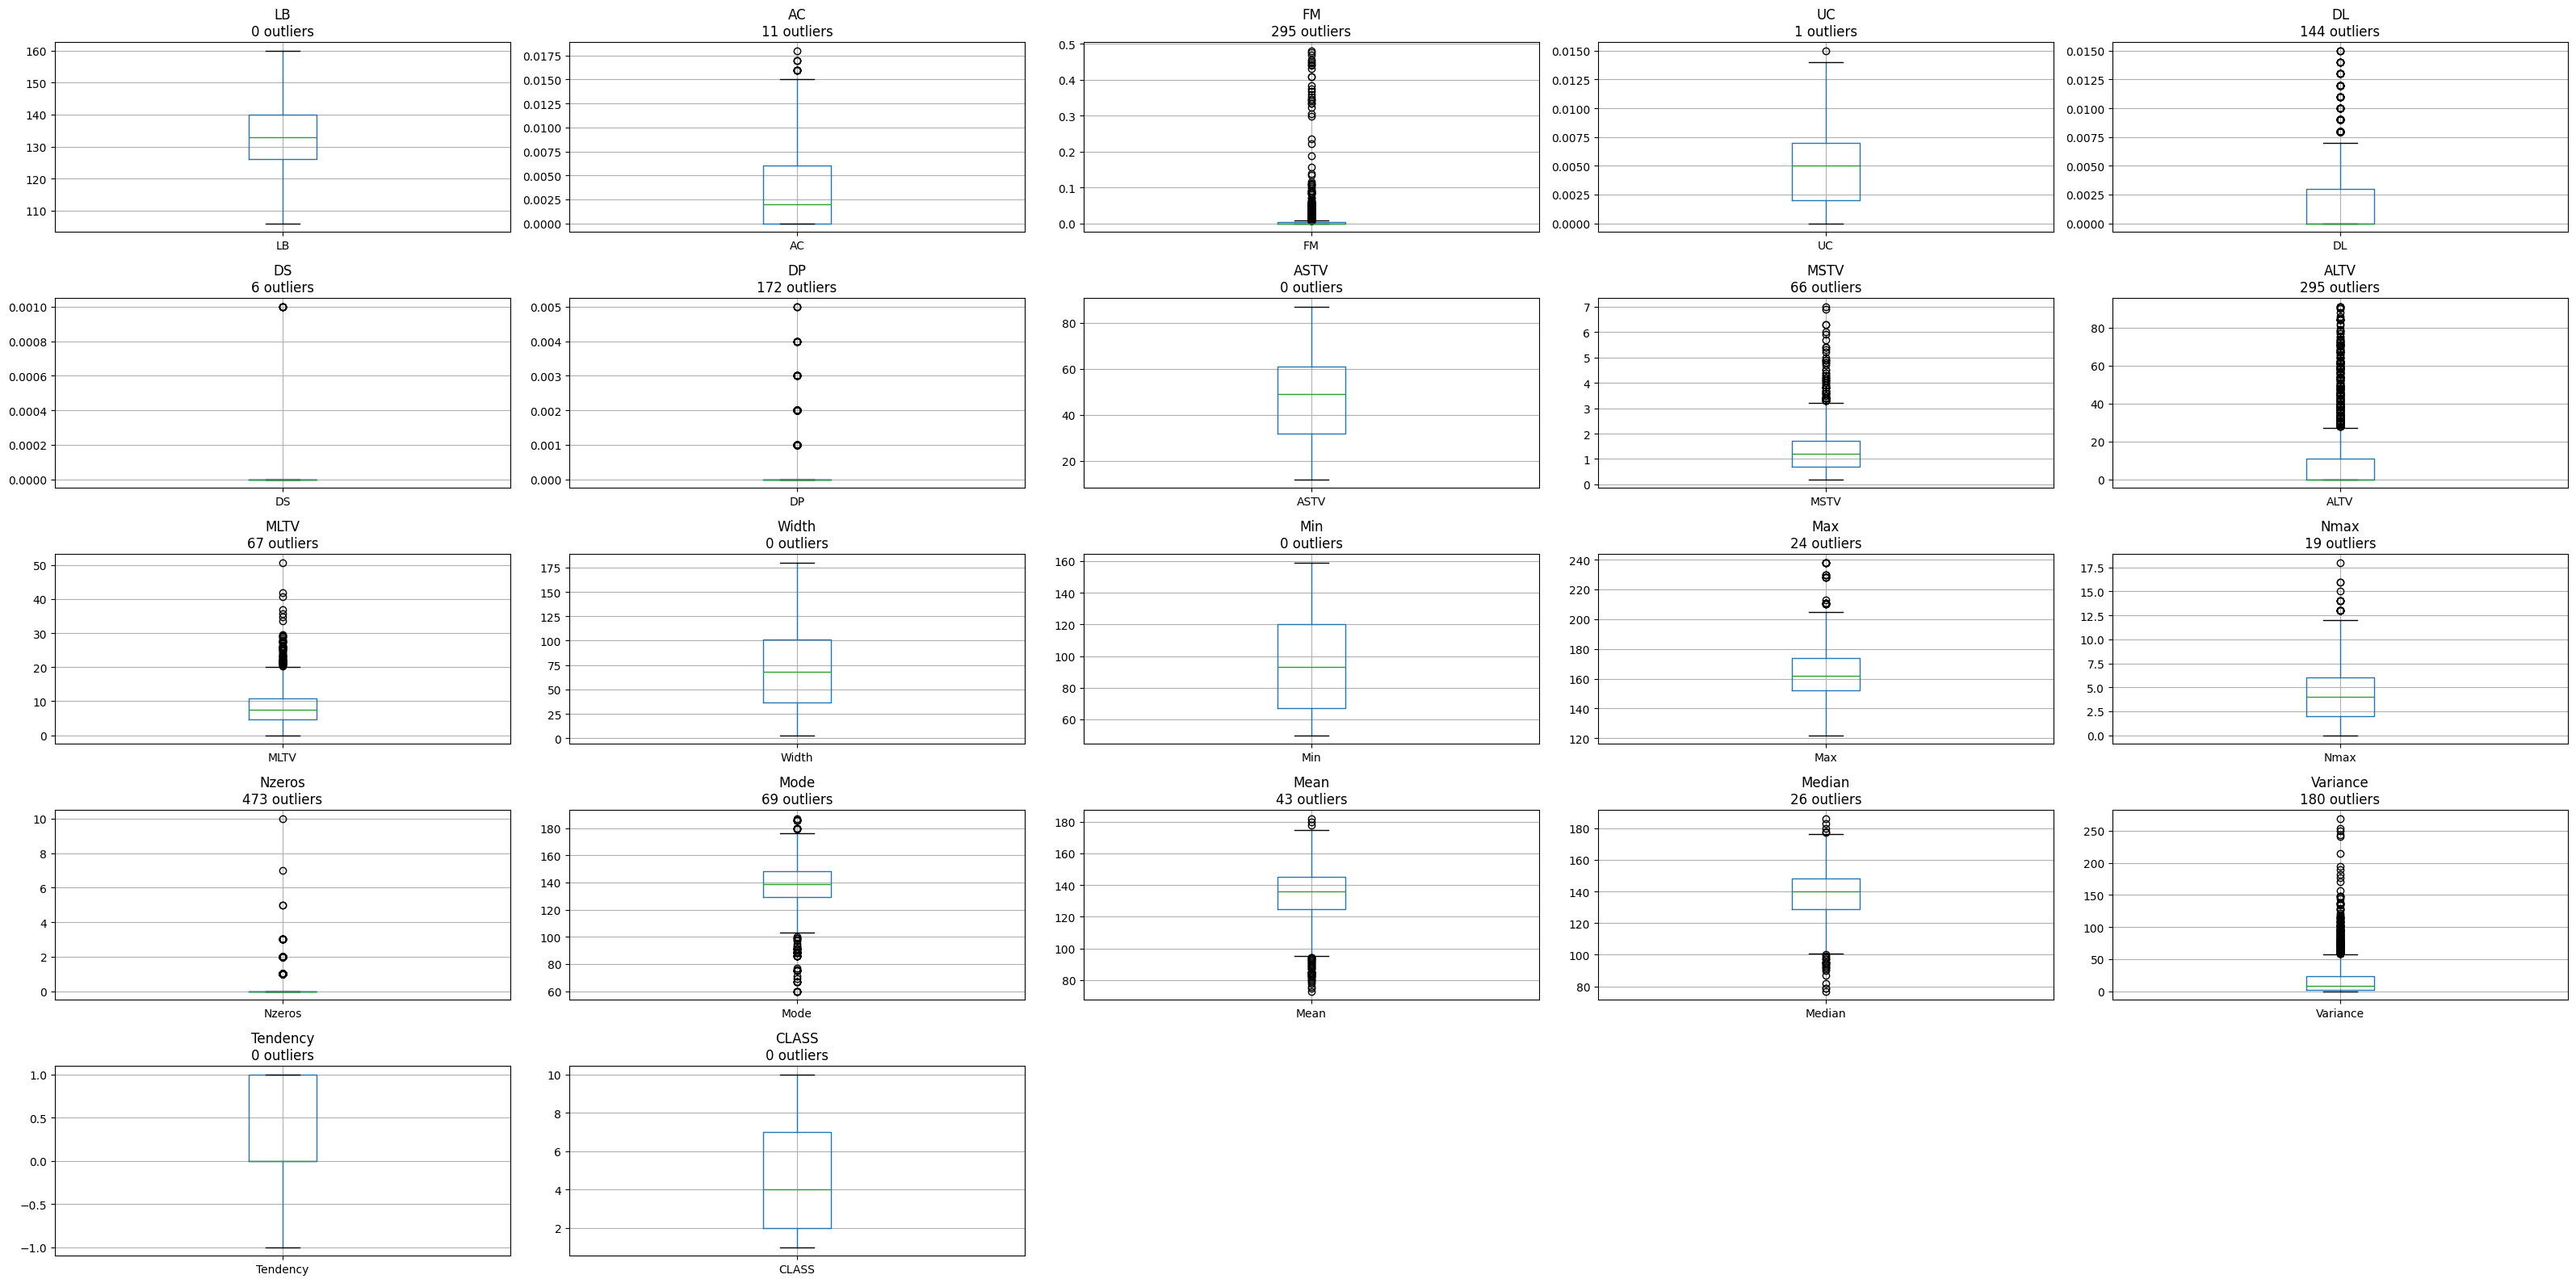

In [40]:
def detect_outliers(df, numeric_cols, method="iqr"):
    """
    Detect outliers using IQR method and visualize with box plots.
    Outliers can significantly impact model performance and need careful handling.
    """
    print(f"🔍 Detecting outliers using {method.upper()} method...")

    outlier_summary = {}

    # Calculate outliers for each numeric feature
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = {
            "count": len(outliers),
            "percentage": (len(outliers) / len(df)) * 100,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
        }

    # Display outlier summary
    print("\n📊 Outlier summary:")
    for col, info in outlier_summary.items():
        if info["count"] > 0:
            print(f"  {col}: {info['count']} outliers ({info['percentage']:.1f}%)")

    
    fig, axes = plt.subplots(5, 5, figsize=(32, 16))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f"{col}\n{outlier_summary[col]['count']} outliers")

    # Hide unused subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    return outlier_summary


outlier_info = detect_outliers(df, numeric_cols)

Box plots confirm previous observations - outliers indicates suspicious/dangerous cases.

# Conclusions

We'll have to handle:
- missing values - using interpolation
- class imbalance
- standarize/normalize data